In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

df.dropna().sum()
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [5]:
df.replace("?",np.nan,inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop("educational-num",axis=1,inplace=True)

In [8]:
cat_col = df.select_dtypes(include="O").columns

In [9]:
# num_col = df.select_dtypes(exclude="O")
# num_col.head()

In [10]:
from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le
print("encode columns:",cat_col.tolist())

encode columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [11]:
df.to_csv('Daya2.csv',index=False)

In [12]:
x = df.drop("income",axis=1)
y = df[["income"]]

In [13]:
## train and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2,
    random_state=42
)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
dt.score(x_test,y_test)

0.8063087991145546

In [16]:
dt.score(x_train,y_train)

0.9999169894853348

In [17]:
pred = dt.predict(x_test)
y_test["prediction"] = pred
y_test

,income,prediction
12010,0,0
12197,0,1
4488,0,1
23026,0,0
19544,0,0
...,...,...
46445,0,1
17149,1,1
45708,0,0
9840,0,0


In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
confusion_matrix(y_test["income"],y_test["prediction"])

array([[5955,  887],
       [ 863, 1330]], dtype=int64)

<Axes: >

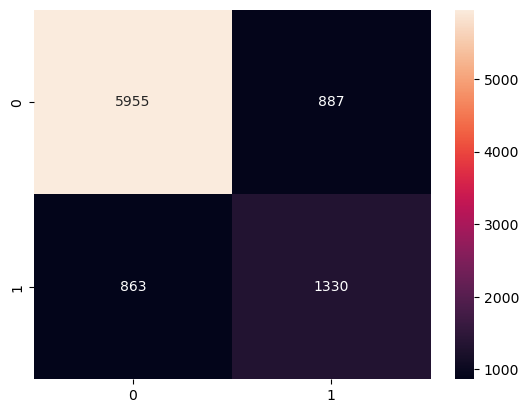

In [20]:
sns.heatmap(confusion_matrix(y_test["income"],y_test["prediction"]),annot=True,fmt="d")

In [21]:
## classification report
print(classification_report(y_test["income"],y_test["prediction"]))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6842
           1       0.60      0.61      0.60      2193

    accuracy                           0.81      9035
   macro avg       0.74      0.74      0.74      9035
weighted avg       0.81      0.81      0.81      9035



In [22]:
from sklearn.tree import plot_tree

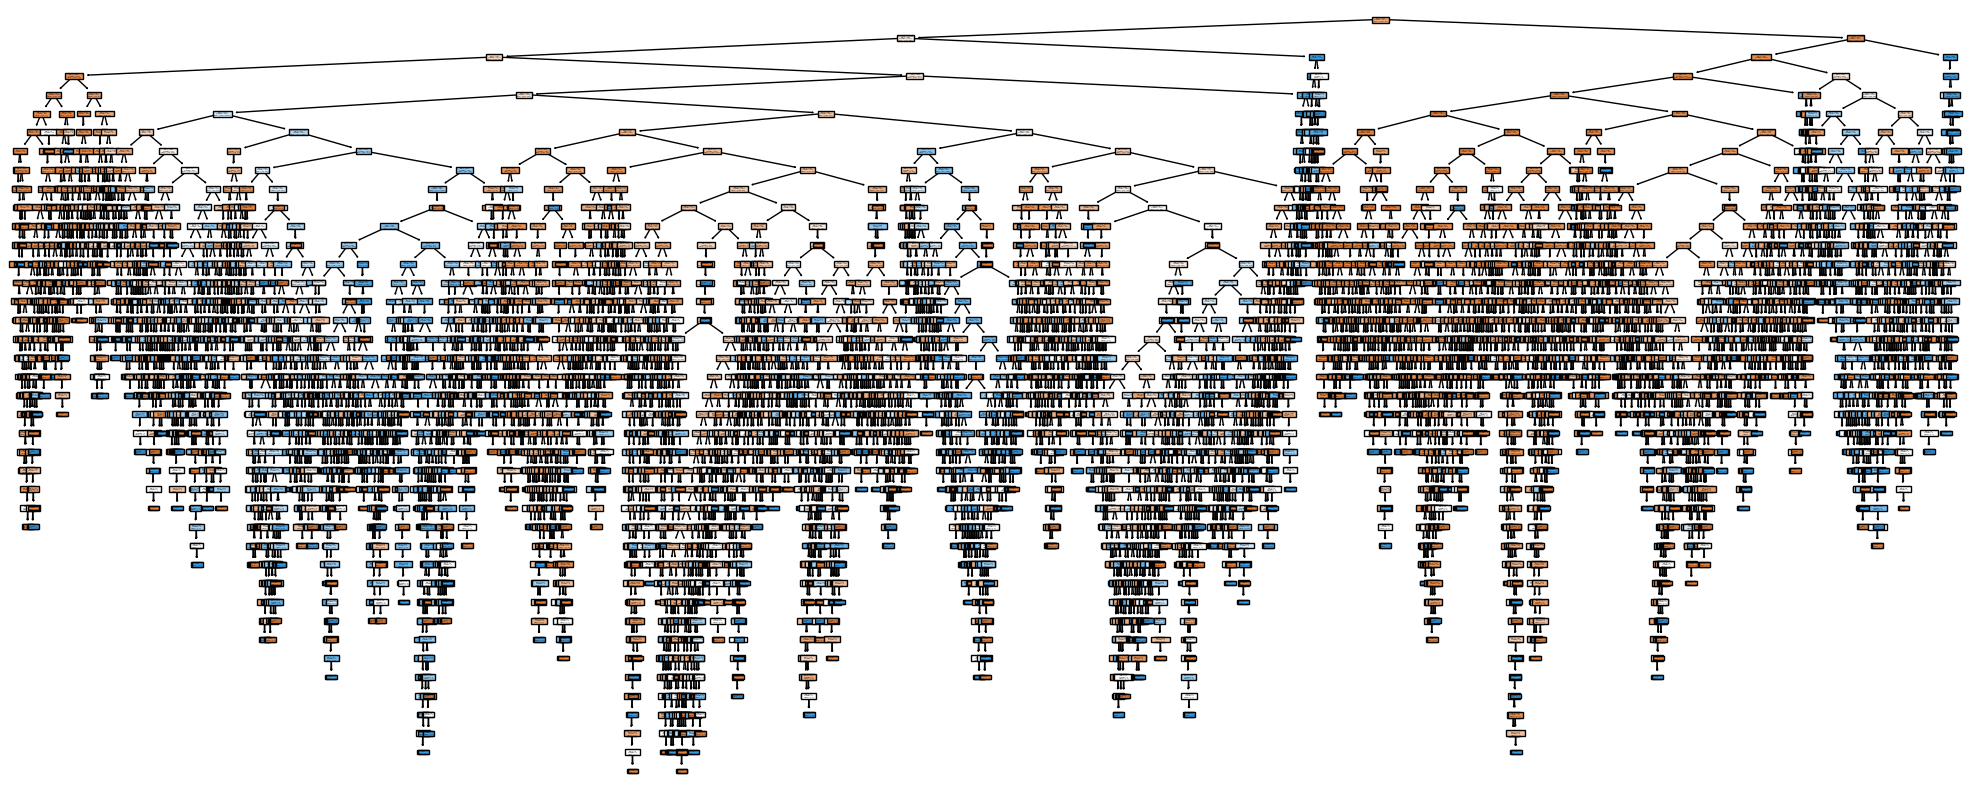

In [23]:
plt.figure(figsize=(25,10))
plot_tree(dt,filled=True,feature_names=x.columns)
class_name = ["<=50K",">50K"]
plt.show()